## Ejemplos Ecuaciones diferenciales ordinarias

**Ley de enfriamiento de Newton**
	$$\frac{dT}{dt}=k(T-T_A), \ T(0)=T_0$$
donde $T=T(t)$ y $k<0$, $T_A$, $T_0$ constantes.

[$\star$] Ecuación diferencial separable.

[$\star$] Variable independiente implícita.
	
[$\star$] Solución:
$$T(t)=(T_0-T_A)e^{kt}+T_A$$
*Ejemplo:*

$k=-1/2$, $T_A=15$, $T_0=70$

***Solución numérica***

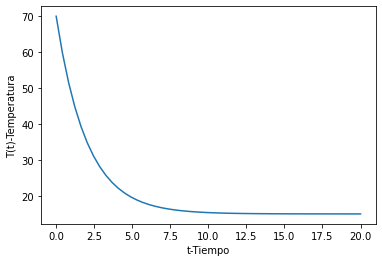

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(T,t):
    k = -0.5
    Ta = 15
    dTdt = k * (T-Ta)
    return dTdt

T0 = 70

t = np.linspace(0,20)

T = odeint(model,T0,t)

plt.plot(t,T)
plt.xlabel('t-Tiempo')
plt.ylabel('T(t)-Temperatura')
plt.show()

***Solución explícita***

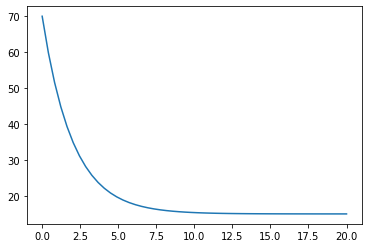

In [3]:
import pylab as pl
k = -0.5
Ta = 15
Tr = (T0-Ta)*np.exp(k*t)+Ta
pl.plot(t,Tr)

## Ecuación de Gompertz (Modelo poblacional)

 $$\frac{dP}{dt}=P(a-b\ln P) \ , P(0)=P_0$$
	
   donde $a$, $b$, $P_0$ constantes.
 
 [$\star$] Ecuación no lineal.
 
 [$\star$] Solución:
    $$\Large P(t)= \LARGE e^{1/b\left(a-\left(e^{-bt}\left(a-b\ln P_0\right)\right)\right)}$$
    
   *Ejemplo*
   $a=1$, $b=2$, $c=5$, $P_0=10$

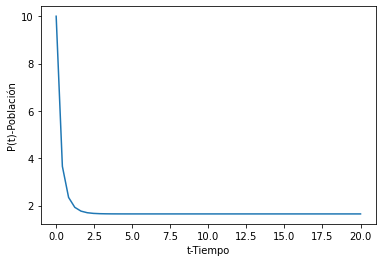

In [20]:
def model2(P,t):
    a = 1
    b = 2
    c = 5
    dPdt = P*(a-b*np.log(P))
    return dPdt

P0 = 10

t = np.linspace(0,20)

P = odeint(model2,P0,t)

plt.plot(t,P)
plt.xlabel('t-Tiempo')
plt.ylabel('P(t)-Población')
plt.show()

***Solución explícita***

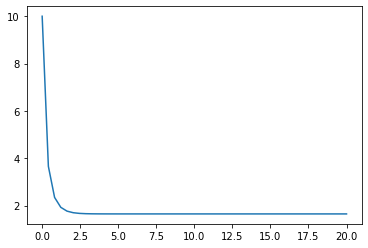

In [25]:
a = 1
b = 2
c = 5
Pr = np.exp(1/b*(a-(np.exp(-b*t)*(a-b*np.log(P0)))))
pl.plot(t,Pr)

***Modelo de inmigración***
	$$\frac{dP}{dt}=P(1-P)+\alpha e^{-P} \ , P(0)=P_0$$
	
   donde $0<\alpha<1$, $P_0$ constante.
	
   [$\star$] Ecuación no lineal separable.
	
   [$\star$] Solución numérica o integral.
   
   *Ejemplo:* $\alpha=1/2$, $P_0=10$

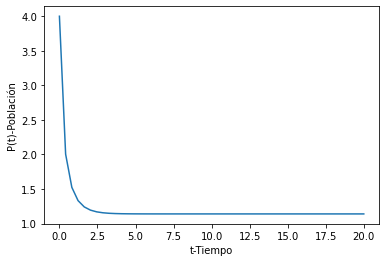

In [29]:
def model3(P1,t):
    alpha = 1/2
    dP1dt = P1*(1-P1)+alpha*np.exp(-P1)
    return dP1dt

P10 = 4

t = np.linspace(0,20)

P1 = odeint(model3,P10,t)

plt.plot(t,P1)
plt.xlabel('t-Tiempo')
plt.ylabel('P(t)-Población')
plt.show()

## Mezclas de sal entre dos tanques
	
    
 $$
        \left\{ \begin{array}{l}
		\frac{dx_1}{dt}=-\frac{2}{25}x_1+\frac{1}{50}x_2 \\
		\frac{dx_2}{dt}=\frac{2}{25}x_1-\frac{2}{25}x_2 \\
	\end{array}
	\right.
	$$

    
con $x_1(0)=25$, $x_2(0)=0$.

[$\star$] Sistema lineal.

[$\star$] Solución:
	$$
	\left\{ \begin{array}{l}
		x_1(t)=\dfrac{25}{2}(e^{-t/25}+e^{-3t/25})\\
		x_2(t)=25(e^{-t/25}-e^{-3t/25}) \\
	\end{array}
	\right.
	$$

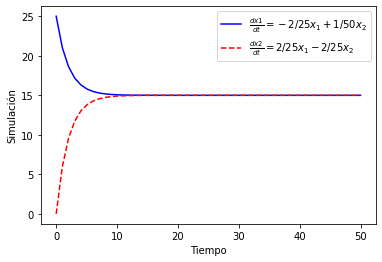

In [47]:
def model4(z,t):
    dxdt = (-2/25)*z[1]+(1/50)*z[2]
    dydt = (2/25)*z[1]-(2/25)*z[2]
    dzdt = [dxdt,dydt]
    return dzdt
z0 = [25,0]

t = np.linspace(0,50)

z = odeint(model,z0,t)

plt.plot(t,z[:,0],'b-',label=r'$\frac{dx1}{dt}=-2/25x_1+1/50x_2$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dx2}{dt}=2/25x_1-2/25x_2$')
plt.ylabel('Simulación')
plt.xlabel('Tiempo')
plt.legend(loc='best')
plt.show()

***Solución explícita***

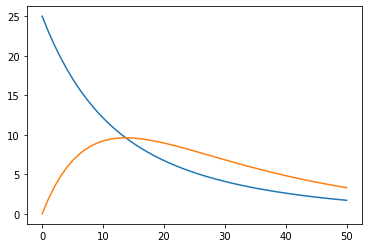

In [49]:
t = np.linspace(0,50)
x1r = 25/2*(np.exp(-3*t/25)+np.exp(-t/25))
x2r = 25*(np.exp(-t/25)-np.exp(-3*t/25))
pl.plot(t,x1r,t,x2r)